# Data processing

Here I'm generating non-upsampled matrices from dataset without album duplicates. I'll read these files in python and upsample to 16.

In [58]:
setwd("/home/pasoneto/Documents/github/doc_suomi/code")
source("utils.R")
source("data_cook.R")
cat(howto_data)

`summarise()` regrouping output by 'album_id' (override with `.groups` argument)



How to use datasets
 
call    base()             for real values
call    z_scored()         for normalized
call    min_maxed()        for normalized2
call    dissim_matrix()    for dissimilarities
call    upsampled_album()  for binded upsamplped albums
call    list_upsampled()   for list of upsampled albums
call    list_dissim()      for list of disssimilarities

In [59]:
# Calling processed data
dt = z_scored()

In [60]:
# Separating albums
dt = album_splitter(dt)

In [61]:
# writing albums for upsampling (python)
setwd("/home/pasoneto/Documents/github/doc_suomi/code/data_processing/upsampled_albums")
for(i in 1:length(dt)){
    write.csv(dt[[i]], paste("matriz", i,".csv", sep = ""), row.names=FALSE)
}

# Change code
Go to upsampling_python.ipynb and upsample all albums. Return and import results below.

In [63]:
# Reading upsampled albums
file_list <- list.files(path="/home/pasoneto/Documents/github/doc_suomi/code/data_processing/upsampled_albums")
matrices = c()

# Reading files
for(i in 1:length(file_list)){
    file = paste("/home/pasoneto/Documents/github/doc_suomi/code/data_processing/upsampled_albums/", file_list[i], sep = "")
    matrices[[i]] = fread(file, header = TRUE)
}

matrices[[351]] <- NULL

for(i in 1:length(matrices)){
    colnames(matrices[[i]]) <- c("track_number", "album_id", "valence", "energy", "loudness", "tempo")
    matrices[[i]]$album_id <- as.character(matrices[[i]]$album_id)
    matrices[[i]]$track_number <- c(seq(1, 10, 1))
}

In [64]:
matrices = dissim_gen(matrices)

In [65]:
dt <- matrix_parser(matrices,  function(x){mean(x, na.rm = TRUE)})
std <- matrix_parser(matrices, function(x){sd(x, na.rm = TRUE)/sqrt(length(x))})

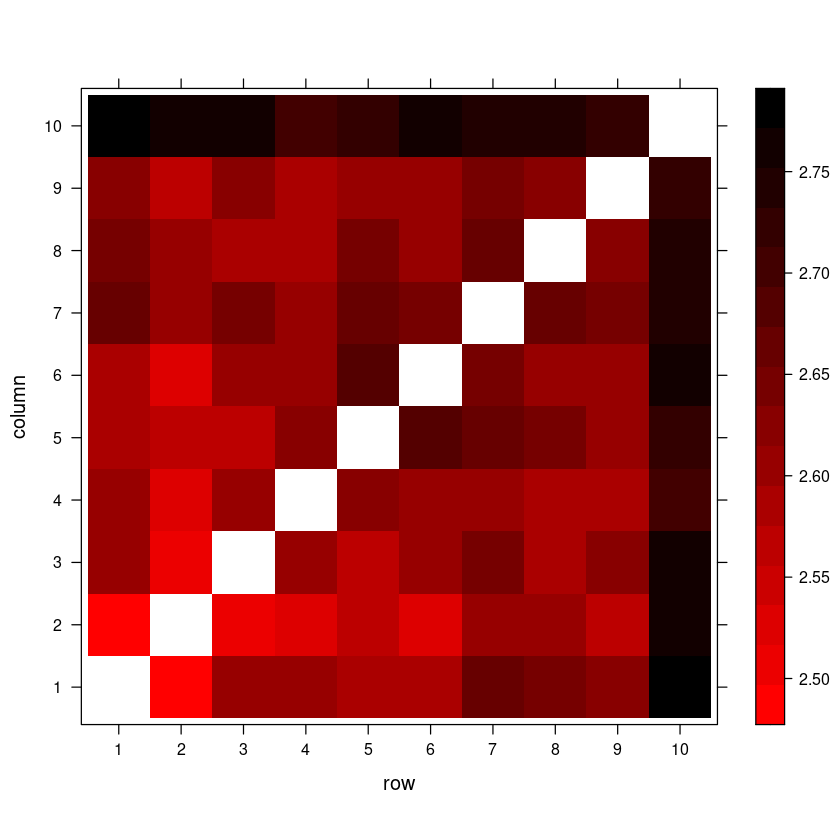

In [66]:
redblack = colorRampPalette(c("red", "black"))(100)
levelplot(dt, col.regions = redblack)

In [67]:
d = list()
for(i in 1:99){
    d[[i]] = dt[i, i+1]
}

s = list()
for(i in 1:99){
    s[[i]] = std[i, i+1]
}

ERROR: Error in dt[i, i + 1]: subscript out of bounds


In [ ]:
oi = tibble(dissim = as.numeric(d), sd = as.numeric(s), track_number = c(seq(1, 10, 1)))
oi %<>% na.omit()
ggplot(oi, aes(x = track_number, y = dissim))+
    geom_point(size = 3) +
    geom_errorbar(aes(ymin = dissim-sd, ymax = dissim+sd))